<a href="https://colab.research.google.com/github/rezamohamadlo/Rock-Paper-Scissors-Classifier-With-CNN/blob/main/Rock_Paper_Scissors_Classifier_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os  # Interact with the operating system for file management
import random  # Generate random numbers, useful for random sampling and augmentation
import numpy as np  # Efficient numerical computations with arrays and matrices
from io import BytesIO  # Handle byte streams for in-memory file operations

# Plotting and working with images
import matplotlib.pyplot as plt  # Visualization library for creating plots
import matplotlib.image as mpimg  # Image I/O utility with Matplotlib

import tensorflow as tf  # TensorFlow framework for deep learning

# Interactive widgets for Jupyter notebooks
from ipywidgets import widgets  # Library for creating interactive widgets


In [2]:
# Download the datasets
!wget https://storage.googleapis.com/learning-datasets/rps.zip  # Download the Rock-Paper-Scissors training dataset
!wget https://storage.googleapis.com/learning-datasets/rps-test-set.zip  # Download the Rock-Paper-Scissors test dataset

# Unzip the training dataset
!unzip rps.zip -d /content/rps  # Extract the training dataset into the /content/rps directory

# Unzip the test dataset
!unzip rps-test-set.zip -d /content/rps-test-set  # Extract the test dataset into the /content/rps-test-set directory

--2024-09-05 09:03:51--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   121MB/s    in 1.6s    

2024-09-05 09:03:53 (121 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-09-05 09:03:53--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    1

In [3]:
# Define base directory and subdirectories for the dataset
BASE_DIR = '/content/rps/rps'
rock_dir = os.path.join(BASE_DIR, 'rock')
paper_dir = os.path.join(BASE_DIR, 'paper')
scissors_dir = os.path.join(BASE_DIR, 'scissors')

# Print the total number of images in each category
print(f'Total training rock images: {len(os.listdir(rock_dir))}')
print(f'Total training paper images: {len(os.listdir(paper_dir))}')
print(f'Total training scissors images: {len(os.listdir(scissors_dir))}')

# List files in each subdirectory
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

# Print the first 5 files in each subdirectory
print()
print(f"5 files in the rock subdir: {rock_files[:5]}")
print(f"5 files in the paper subdir: {paper_files[:5]}")
print(f"5 files in the scissors subdir: {scissors_files[:5]}")


Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840

5 files in the rock subdir: ['rock04-119.png', 'rock04-102.png', 'rock02-018.png', 'rock02-090.png', 'rock04-084.png']
5 files in the paper subdir: ['paper07-046.png', 'paper04-005.png', 'paper07-018.png', 'paper06-102.png', 'paper03-049.png']
5 files in the scissors subdir: ['scissors01-031.png', 'scissors02-009.png', 'scissors03-092.png', 'testscissors02-111.png', 'testscissors01-072.png']


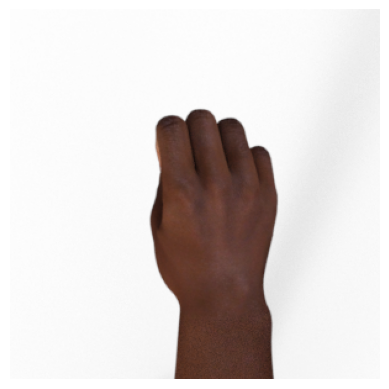

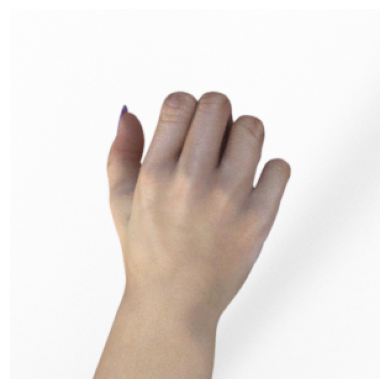

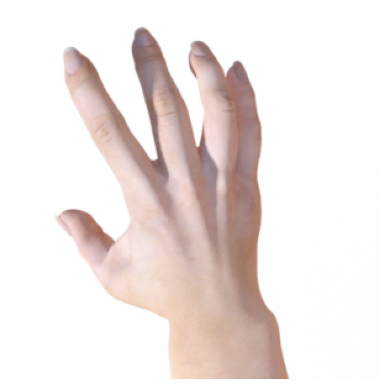

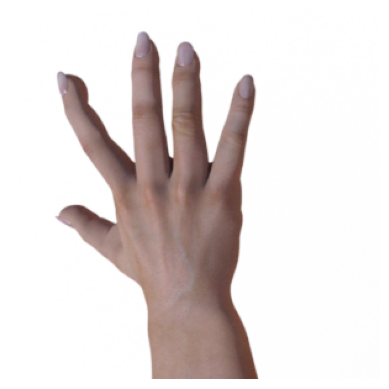

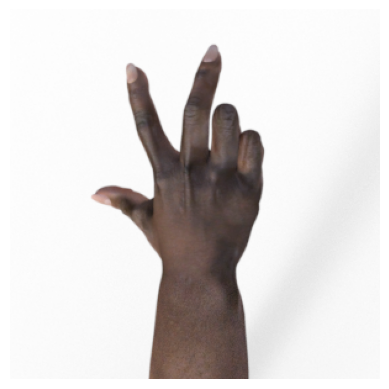

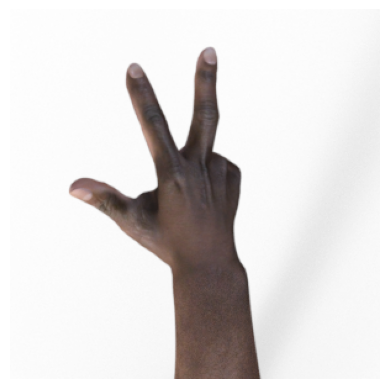

In [4]:
# Randomly sample 2 image filenames from each category
next_rock = [os.path.join(rock_dir, fname) for fname in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, fname) for fname in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, fname) for fname in random.sample(scissors_files, k=2)]

# Combine the sampled images from all categories
sampled_images = next_rock + next_paper + next_scissors

# Display the sampled images
for i, img_path in enumerate(sampled_images):
    img = mpimg.imread(img_path)  # Read the image file
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Hide the axis
    plt.show()  # Show the plot


In [5]:
# Define paths for training and validation directories
TRAINING_DIR = "/content/rps/rps"
VALIDATION_DIR = "/content/rps-test-set/rps-test-set"

# Load the training dataset with integer labels
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,  # Number of images to return in each batch
    label_mode='int'  # Labels will be integers (class indices)
)

# Load the validation dataset with integer labels
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,  # Number of images to return in each batch
    label_mode='int'  # Labels will be integers (class indices)
)


Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [6]:
# Define the base convolutional neural network model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),  # Input layer with image size 150x150 and 3 color channels (RGB)

    # First convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and ReLU activation
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer to reduce spatial dimensions

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and ReLU activation
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer to reduce spatial dimensions

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and ReLU activation
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer to reduce spatial dimensions

    # Fourth convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Convolutional layer with 128 filters and ReLU activation
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer to reduce spatial dimensions

    # Flatten the output from the convolutional layers to feed into fully connected layers
    tf.keras.layers.Flatten(),

    # Dropout layer for regularization to prevent overfitting
    tf.keras.layers.Dropout(0.5),

    # Fully connected dense layer with 512 units and ReLU activation
    tf.keras.layers.Dense(512, activation='relu'),

    # Output layer with 3 units (one for each class) and softmax activation
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes
])


In [7]:
# Create the data augmentation layer to enhance model generalization
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  # Randomly flip images horizontally
    tf.keras.layers.RandomRotation(0.4),  # Randomly rotate images by up to 40 degrees
    tf.keras.layers.RandomTranslation(0.2, 0.2),  # Randomly translate images by up to 20% of the width and height
    tf.keras.layers.RandomContrast(0.4),  # Randomly adjust the contrast of images by up to 40%
    tf.keras.layers.RandomZoom(0.2),  # Randomly zoom images by up to 20%
])


In [8]:
# Combine data augmentation with the base model
model_with_aug = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),  # Input layer specifying image size and number of color channels (RGB)
    data_augmentation,  # Apply data augmentation transformations
    tf.keras.layers.Rescaling(1./255),  # Rescale pixel values to the range [0, 1] after augmentation
    model  # Add the base convolutional model
])


In [9]:
# Compile the model using SparseCategoricalCrossentropy
model_with_aug.compile(
    optimizer='adam',  # Optimizer for training the model
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Loss function for sparse categorical labels
    metrics=['accuracy']  # Metrics to monitor during training and evaluation
)

# Print the model summary to check the architecture
model_with_aug.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 3)                   │       3,473,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model_with_aug.fit(
    train_dataset,  # Training dataset
    epochs=25,  # Number of epochs to train the model
    validation_data=validation_dataset,  # Validation dataset to evaluate the model's performance
    verbose=1  # Verbosity mode (1: progress bar)
)


Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.3490 - loss: 1.1759 - val_accuracy: 0.3333 - val_loss: 1.0948
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.3869 - loss: 1.0788 - val_accuracy: 0.6344 - val_loss: 1.0278
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.4713 - loss: 1.0163 - val_accuracy: 0.7043 - val_loss: 0.7941
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5438 - loss: 0.9273 - val_accuracy: 0.7849 - val_loss: 0.5760
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.6893 - loss: 0.7158 - val_accuracy: 0.8414 - val_loss: 0.3634
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.7624 - loss: 0.5647 - val_accuracy: 0.9489 - val_loss: 0.2348
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.7946 - loss: 0.5117 - val_accuracy: 0.9382 - val_loss: 0.1805
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8239 - loss: 0.4692 - val_accuracy: 0.8629

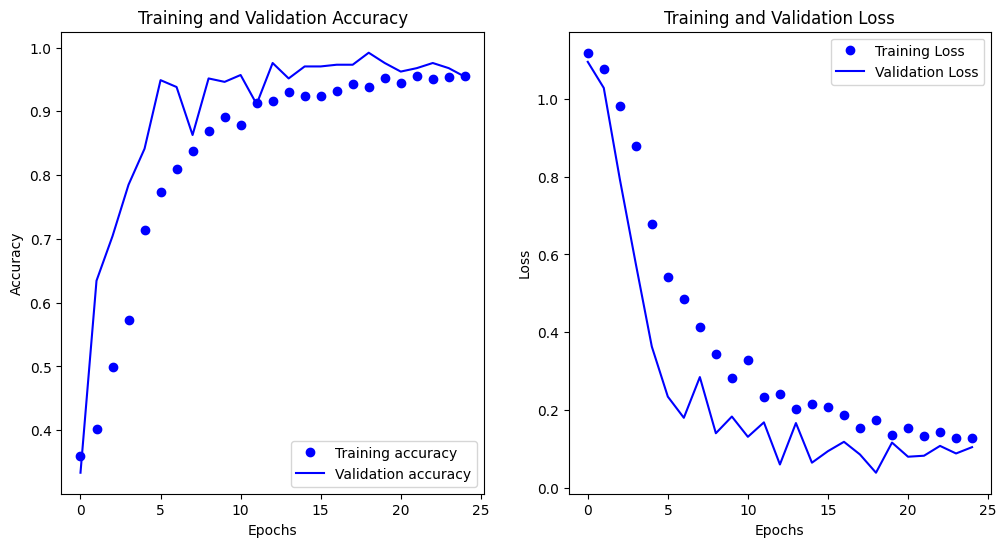

In [11]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''

    # Extract accuracy and loss values from the history object
    acc = history.history['accuracy']  # Training accuracy
    val_acc = history.history['val_accuracy']  # Validation accuracy
    loss = history.history['loss']  # Training loss
    val_loss = history.history['val_loss']  # Validation loss

    # Create a range for the number of epochs
    epochs = range(len(acc))

    # Set up the plotting area with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation accuracy
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')  # Training accuracy (blue dots)
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')  # Validation accuracy (blue line)
    ax[0].set_title('Training and Validation Accuracy')  # Title of the accuracy plot
    ax[0].set_xlabel('Epochs')  # X-axis label
    ax[0].set_ylabel('Accuracy')  # Y-axis label
    ax[0].legend()  # Show legend

    # Plot training and validation loss
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')  # Training loss (blue dots)
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')  # Validation loss (blue line)
    ax[1].set_title('Training and Validation Loss')  # Title of the loss plot
    ax[1].set_xlabel('Epochs')  # X-axis label
    ax[1].set_ylabel('Loss')  # Y-axis label
    ax[1].legend()  # Show legend

    plt.show()  # Display the plots

# Call the function to plot the training and validation metrics
plot_loss_acc(history)


In [12]:
# Create the file upload widget for image files
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)  # Display the file upload widget

# Create an output widget to display predictions
out = widgets.Output()
display(out)  # Display the output widget

def file_predict(filename, file, out):
    """Function to make predictions on uploaded images and print the results."""
    # Load and preprocess the image
    image = tf.keras.utils.load_img(file, target_size=(150, 150))  # Load the image with target size 150x150
    image = tf.keras.utils.img_to_array(image)  # Convert image to array
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(image, verbose=0)[0]  # Predict and get the result for the single image

    # Display the results
    with out:
        print(f'\nModel output: {prediction}')  # Print the model's raw output

        # Get the index of the highest probability
        prediction_index = np.argmax(prediction)

        # Define class names
        classes = ["paper", "rock", "scissors"]

        # Determine the predicted class
        predicted_class = classes[prediction_index]

        print(f'{filename} is {predicted_class}')  # Print the predicted class

def on_upload_change(change):
    """Function to handle file uploads and run predictions."""
    # Get the newly uploaded file(s)
    items = change.new
    for item in items:  # Loop if there are multiple files uploaded
        file_jpgdata = BytesIO(item.content)  # Convert the file content to BytesIO object
        file_predict(item.name, file_jpgdata, out)  # Predict the class of the uploaded file

# Observe changes in the file upload widget and run the `on_upload_change` function when files are uploaded
uploader.observe(on_upload_change, names='value')


FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()